In [30]:
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [29]:
h2o.init(ip='localhost')
rrch = h2o.upload_file("/home/magnus/Desktop/rasp_rnakb_cv2.csv")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 10 hours 59 mins
H2O cluster version:,3.10.4.5
H2O cluster version age:,"7 days, 4 hours and 22 minutes"
H2O cluster name:,H2O_from_python_magnus_t4gete
H2O cluster total nodes:,1
H2O cluster free memory:,1.400 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [31]:
dp = H2ODeepLearningEstimator(activation = "Tanh", hidden = [10, 10, 10], epochs = 10000, 
                              keep_cross_validation_predictions=True, 
                              ignored_columns = ['fn', 'pdb_id','pdb_id_chain', 'pdb_id_chain_source', 'source'])
dp.train(x = list(set(rrch.col_names) - set(['rmsd_all'])), y ="rmsd_all", training_frame = rrch, 
         fold_column="cv")

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [41]:
df = rrch.cbind([dp.cross_validation_holdout_predictions(),dp.cross_validation_predictions()[0]])

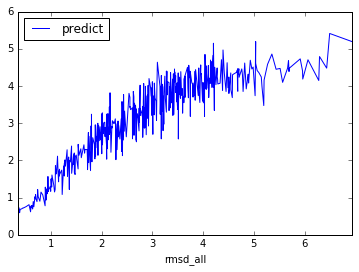

In [47]:
dfp = df.as_data_frame()
#dfpandas.to_csv('/home/magnus/Desktop/dfpandas.csv')
curr_rna = dfp[ dfp.pdb_id_chain_source == "1msyA_rasp" ] 
curr_rna.sort_values('rmsd_all').plot(x='rmsd_all', y='predict')

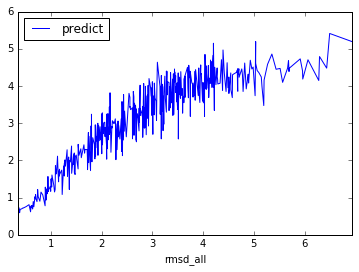

In [48]:
df2 = pd.read_csv("/home/magnus/Desktop/rasp_rnakb_cv2.csv")
df2['predict'] = dp.cross_validation_predictions()[0].as_data_frame()
curr_rna = df2[ df2.pdb_id_chain_source == "1msyA_rasp" ] 
curr_rna.sort_values('rmsd_all').plot(x='rmsd_all', y='predict')

In [49]:
rrch2 = h2o.H2OFrame(df2)

dp2 = H2ODeepLearningEstimator(activation = "Tanh", hidden = [10, 10, 10], epochs = 10000, 
                              keep_cross_validation_predictions=True, 
                              ignored_columns = ['fn', 'pdb_id','pdb_id_chain', 'pdb_id_chain_source', 'source'])
dp2.train(x = list(set(rrch.col_names) - set(['rmsd_all'])), y ="rmsd_all", training_frame = rrch, 
         fold_column="cv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


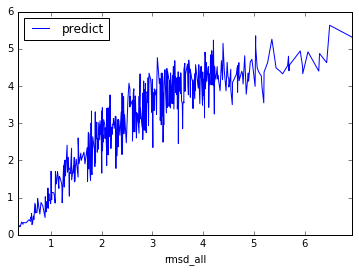

In [54]:
rrc2 = pd.read_csv("/home/magnus/Desktop/rasp_rnakb_cv2.csv")
rrc2['predict'] = dp2.cross_validation_predictions()[0].as_data_frame()
curr_rna = rrc2[ rrc2.pdb_id_chain_source == "1msyA_rasp" ] 
curr_rna.sort_values('rmsd_all').plot(x='rmsd_all', y='predict')

In [57]:
rrc3 = pd.read_csv("/home/magnus/Desktop/rasp_rnakb_cv2.csv")
rrc3 = rrc3[rrc3.rmsd_all < 10] ###################################### 
rrc3h = h2o.H2OFrame(rrc3)

dp3 = H2ODeepLearningEstimator(activation = "Tanh", hidden = [10, 10, 10], epochs = 10000, 
                              keep_cross_validation_predictions=True, 
                              ignored_columns = ['fn', 'pdb_id','pdb_id_chain', 'pdb_id_chain_source', 'source'])
dp3.train(x = list(set(rrc3h.col_names) - set(['rmsd_all'])), y ="rmsd_all", 
          training_frame = rrc3h, fold_column="cv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


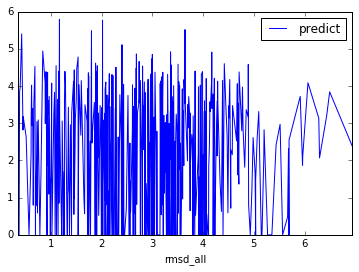

In [58]:
rrc3['predict'] = dp3.cross_validation_predictions()[0].as_data_frame()
curr_rna = rrc3[ rrc3.pdb_id_chain_source == "1msyA_rasp" ] 
curr_rna.sort_values('rmsd_all').plot(x='rmsd_all', y='predict')

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


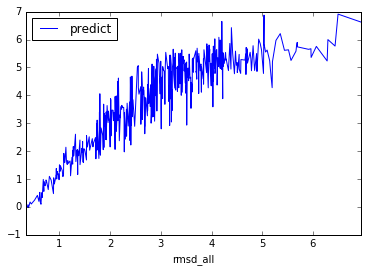

In [59]:
rrc3 = pd.read_csv("/home/magnus/Desktop/rasp_rnakb_cv2.csv")
#rrc3 = rrc3[rrc3.rmsd_all < 10] ###################################### 
rrc3h = h2o.H2OFrame(rrc3)

dp3 = H2ODeepLearningEstimator(activation = "Tanh", hidden = [10, 10, 10], epochs = 10000, 
                              keep_cross_validation_predictions=True, 
                              ignored_columns = ['fn', 'pdb_id','pdb_id_chain', 'pdb_id_chain_source', 'source'])
dp3.train(x = list(set(rrc3h.col_names) - set(['rmsd_all'])), y ="rmsd_all", 
          training_frame = rrc3h, fold_column="cv")
rrc3['predict'] = dp3.cross_validation_predictions()[0].as_data_frame()
curr_rna = rrc3[ rrc3.pdb_id_chain_source == "1msyA_rasp" ] 
curr_rna.sort_values('rmsd_all').plot(x='rmsd_all', y='predict')